In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/best_training_data.xlsx"
best_training_data = pd.read_excel(training_path)

testing_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/best_testing_data.xlsx"
best_testing_data = pd.read_excel(testing_path)

best_X_train = best_training_data.drop("W/L", axis=1)
best_y_train = best_training_data["W/L"]

best_X_test = best_testing_data.drop("W/L", axis=1)
best_y_test = best_testing_data["W/L"]

In [ ]:
# original_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/orginal_testing_data.xlsx"
# original_testing_data = pd.read_excel(original_path)

# orginal_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/orginal_training_data.xlsx"
# original_training_data = pd.read_excel(orginal_path)

# original_X_train = original_training_data.drop("W/L", axis=1)
# original_y_train = original_training_data["W/L"]

# original_X_test = original_testing_data.drop("W/L", axis=1)
# original_y_test = original_testing_data["W/L"]

In [ ]:
# reduced_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/reduced_testing_data.xlsx"
# reduced_testing_data = pd.read_excel(reduced_path)

# reduced_path = "/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Data/reduced_training_data.xlsx"
# reduced_training_data = pd.read_excel(reduced_path)

# reduced_X_train = reduced_training_data.drop("W/L", axis=1)
# reduced_y_train = reduced_training_data["W/L"]

# reduced_X_test = reduced_testing_data.drop("W/L", axis=1)
# reduced_y_test = reduced_testing_data["W/L"]

In [ ]:
best_X_train.shape

(1770, 44)

In [ ]:
best_X_train.head()

,home_game,Pre_mean_MIN,Opponent_Pre_mean_MIN,Pre_mean_PTS,Opponent_Pre_mean_PTS,Pre_mean_FGM,Opponent_Pre_mean_FGM,Pre_mean_FGA,Opponent_Pre_mean_FGA,Pre_mean_FG%,...,Opponent_Pre_mean_BLK,Pre_mean_TOV,Opponent_Pre_mean_TOV,Pre_mean_PF,Opponent_Pre_mean_PF,Pre_mean_+/-,Opponent_Pre_mean_+/-,Pre_Total_Wins,Weight,Pre_mean_AST_TOV_Ratio
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train your model and test your model
def train_test_predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred),
                              display_labels = model.classes_)
  disp.plot(cmap=plt.cm.Blues)

  return model

Accuracy: 0.6347826086956522
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       345
           1       0.63      0.63      0.63       345

    accuracy                           0.63       690
   macro avg       0.63      0.63      0.63       690
weighted avg       0.63      0.63      0.63       690



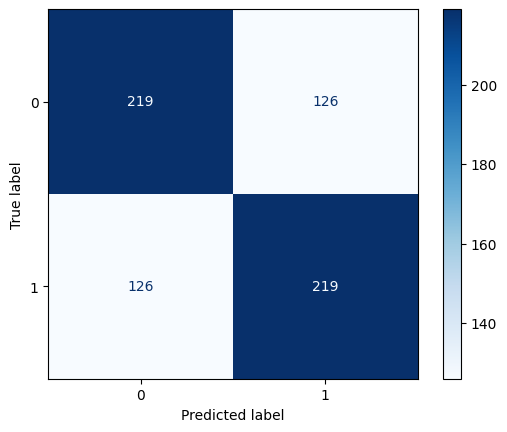

In [ ]:
full_lg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
full_lg = train_test_predict(full_lg, best_X_train, best_X_test, best_y_train, best_y_test)

Accuracy: 0.6478260869565218
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       345
           1       0.66      0.62      0.64       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



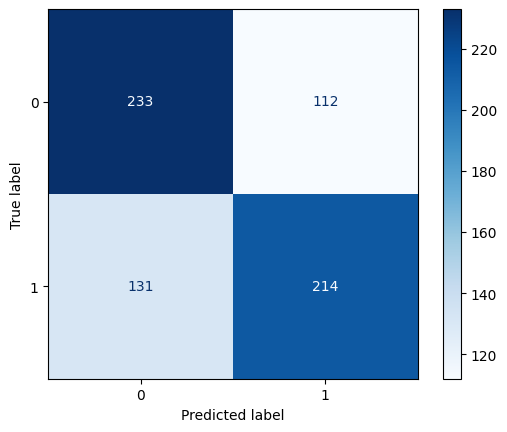

In [ ]:
full_rf = RandomForestClassifier(n_estimators=5, max_depth=3)
full_rf = train_test_predict(full_rf, best_X_train, best_X_test, best_y_train, best_y_test)

Accuracy: 0.6391304347826087
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       345
           1       0.63      0.66      0.65       345

    accuracy                           0.64       690
   macro avg       0.64      0.64      0.64       690
weighted avg       0.64      0.64      0.64       690



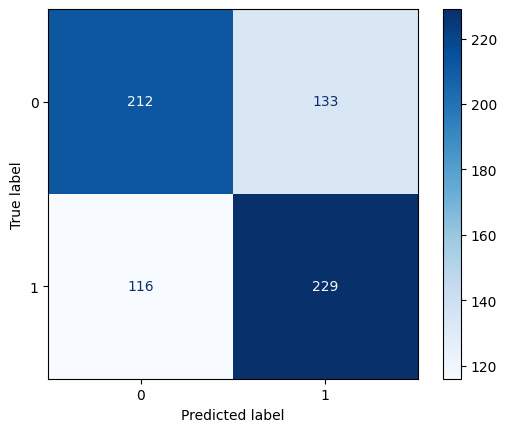

In [ ]:
full_xgb = XGBClassifier(n_estimators = 5, max_depth=3, learning_rate = 0.15)
full_xgb = train_test_predict(full_xgb, best_X_train, best_X_test, best_y_train, best_y_test)

## Select features from dataset including the additional variable

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
forward_feature_selection_lg = SequentialFeatureSelector(
    LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_rf = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators = 5, max_depth = 3),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_xgb = SequentialFeatureSelector(
    XGBClassifier(n_estimators = 5, max_depth = 3, learning_rate = 0.15),
    n_features_to_select="auto",
    direction="forward",
    scoring="accuracy",
)

In [ ]:
forward_feature_selection_lg.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=10000,
                                                       penalty='l1',
                                                       solver='liblinear'),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_rf.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=3,
                                                           n_estimators=5),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_xgb.fit(best_X_train, best_y_train)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.15,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=5, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          scoring='accuracy')

In [ ]:
forward_feature_selection_lg.get_feature_names_out()

array(['home_game', 'Pre_mean_FGM', 'Pre_mean_3PM',
       'Opponent_Pre_mean_3PM', 'Pre_mean_3PA', 'Opponent_Pre_mean_3PA',
       'Opponent_Pre_mean_FTM', 'Opponent_Pre_mean_FTA', 'Pre_mean_FT%',
       'Opponent_Pre_mean_OREB', 'Opponent_Pre_mean_DREB', 'Pre_mean_REB',
       'Opponent_Pre_mean_REB', 'Pre_mean_STL', 'Pre_mean_BLK',
       'Opponent_Pre_mean_BLK', 'Pre_mean_TOV', 'Opponent_Pre_mean_TOV',
       'Pre_mean_PF', 'Pre_mean_+/-', 'Opponent_Pre_mean_+/-', 'Weight'],
      dtype=object)

In [ ]:
forward_feature_selection_rf.get_feature_names_out()

array(['home_game', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FGA', 'Pre_mean_3P%',
       'Opponent_Pre_mean_3P%', 'Pre_mean_FTM', 'Pre_mean_FT%',
       'Opponent_Pre_mean_FT%', 'Pre_mean_OREB', 'Opponent_Pre_mean_OREB',
       'Pre_mean_DREB', 'Pre_mean_REB', 'Pre_mean_AST', 'Pre_mean_STL',
       'Opponent_Pre_mean_BLK', 'Opponent_Pre_mean_PF', 'Pre_mean_+/-',
       'Opponent_Pre_mean_+/-', 'Pre_Total_Wins',
       'Pre_mean_AST_TOV_Ratio'], dtype=object)

In [ ]:
forward_feature_selection_xgb.get_feature_names_out()

array(['Pre_mean_MIN', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FG%', 'Opponent_Pre_mean_FG%',
       'Pre_mean_3PM', 'Opponent_Pre_mean_3PM', 'Opponent_Pre_mean_3PA',
       'Pre_mean_3P%', 'Opponent_Pre_mean_3P%', 'Pre_mean_FT%',
       'Pre_mean_OREB', 'Opponent_Pre_mean_OREB', 'Pre_mean_DREB',
       'Pre_mean_AST', 'Opponent_Pre_mean_BLK', 'Pre_mean_PF',
       'Pre_mean_+/-', 'Pre_Total_Wins', 'Weight',
       'Pre_mean_AST_TOV_Ratio'], dtype=object)

## Select the best predictors

In [ ]:
selected_training_features_lg = best_training_data[['home_game', 'Pre_mean_FGM', 'Pre_mean_3PM',
       'Opponent_Pre_mean_3PM', 'Pre_mean_3PA', 'Opponent_Pre_mean_3PA',
       'Opponent_Pre_mean_FTM', 'Opponent_Pre_mean_FTA', 'Pre_mean_FT%',
       'Opponent_Pre_mean_OREB', 'Opponent_Pre_mean_DREB', 'Pre_mean_REB',
       'Opponent_Pre_mean_REB', 'Pre_mean_STL', 'Pre_mean_BLK',
       'Opponent_Pre_mean_BLK', 'Pre_mean_TOV', 'Opponent_Pre_mean_TOV',
       'Pre_mean_PF', 'Pre_mean_+/-', 'Opponent_Pre_mean_+/-', 'Weight']]

selected_testing_features_lg = best_testing_data[['home_game', 'Pre_mean_FGM', 'Pre_mean_3PM',
       'Opponent_Pre_mean_3PM', 'Pre_mean_3PA', 'Opponent_Pre_mean_3PA',
       'Opponent_Pre_mean_FTM', 'Opponent_Pre_mean_FTA', 'Pre_mean_FT%',
       'Opponent_Pre_mean_OREB', 'Opponent_Pre_mean_DREB', 'Pre_mean_REB',
       'Opponent_Pre_mean_REB', 'Pre_mean_STL', 'Pre_mean_BLK',
       'Opponent_Pre_mean_BLK', 'Pre_mean_TOV', 'Opponent_Pre_mean_TOV',
       'Pre_mean_PF', 'Pre_mean_+/-', 'Opponent_Pre_mean_+/-', 'Weight']]

In [ ]:
selected_testing_features_lg.shape

(690, 22)

In [ ]:
selected_training_features_rf = best_training_data[['home_game', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FGA', 'Pre_mean_3P%',
       'Opponent_Pre_mean_3P%', 'Pre_mean_FTM', 'Pre_mean_FT%',
       'Opponent_Pre_mean_FT%', 'Pre_mean_OREB', 'Opponent_Pre_mean_OREB',
       'Pre_mean_DREB', 'Pre_mean_REB', 'Pre_mean_AST', 'Pre_mean_STL',
       'Opponent_Pre_mean_BLK', 'Opponent_Pre_mean_PF', 'Pre_mean_+/-',
       'Opponent_Pre_mean_+/-', 'Pre_Total_Wins',
       'Pre_mean_AST_TOV_Ratio']]

selected_testing_features_rf = best_testing_data[['home_game', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FGA', 'Pre_mean_3P%',
       'Opponent_Pre_mean_3P%', 'Pre_mean_FTM', 'Pre_mean_FT%',
       'Opponent_Pre_mean_FT%', 'Pre_mean_OREB', 'Opponent_Pre_mean_OREB',
       'Pre_mean_DREB', 'Pre_mean_REB', 'Pre_mean_AST', 'Pre_mean_STL',
       'Opponent_Pre_mean_BLK', 'Opponent_Pre_mean_PF', 'Pre_mean_+/-',
       'Opponent_Pre_mean_+/-', 'Pre_Total_Wins',
       'Pre_mean_AST_TOV_Ratio']]

In [ ]:
selected_testing_features_rf.shape

(690, 22)

In [ ]:
selected_training_features_xgb = best_training_data[['Pre_mean_MIN', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FG%', 'Opponent_Pre_mean_FG%',
       'Pre_mean_3PM', 'Opponent_Pre_mean_3PM', 'Opponent_Pre_mean_3PA',
       'Pre_mean_3P%', 'Opponent_Pre_mean_3P%', 'Pre_mean_FT%',
       'Pre_mean_OREB', 'Opponent_Pre_mean_OREB', 'Pre_mean_DREB',
       'Pre_mean_AST', 'Opponent_Pre_mean_BLK', 'Pre_mean_PF',
       'Pre_mean_+/-', 'Pre_Total_Wins', 'Weight',
       'Pre_mean_AST_TOV_Ratio']]

selected_testing_features_xgb = best_testing_data[['Pre_mean_MIN', 'Opponent_Pre_mean_MIN', 'Pre_mean_PTS',
       'Pre_mean_FGM', 'Pre_mean_FG%', 'Opponent_Pre_mean_FG%',
       'Pre_mean_3PM', 'Opponent_Pre_mean_3PM', 'Opponent_Pre_mean_3PA',
       'Pre_mean_3P%', 'Opponent_Pre_mean_3P%', 'Pre_mean_FT%',
       'Pre_mean_OREB', 'Opponent_Pre_mean_OREB', 'Pre_mean_DREB',
       'Pre_mean_AST', 'Opponent_Pre_mean_BLK', 'Pre_mean_PF',
       'Pre_mean_+/-', 'Pre_Total_Wins', 'Weight',
       'Pre_mean_AST_TOV_Ratio']]

In [ ]:
selected_testing_features_xgb.shape

(690, 22)

Accuracy: 0.6405797101449275
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       345
           1       0.63      0.67      0.65       345

    accuracy                           0.64       690
   macro avg       0.64      0.64      0.64       690
weighted avg       0.64      0.64      0.64       690



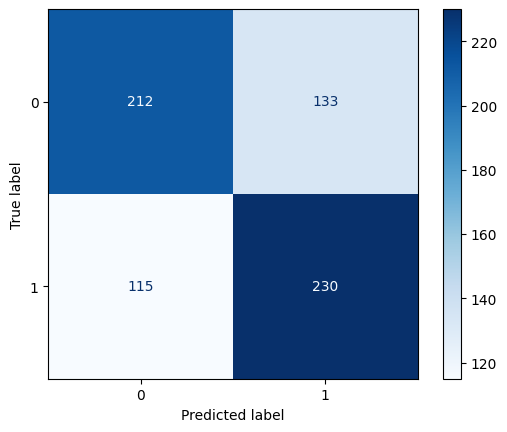

In [ ]:
best_subset_lg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
best_subset_lg = train_test_predict(best_subset_lg,
                                    selected_training_features_lg,
                                    selected_testing_features_lg,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6579710144927536
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       345
           1       0.65      0.67      0.66       345

    accuracy                           0.66       690
   macro avg       0.66      0.66      0.66       690
weighted avg       0.66      0.66      0.66       690



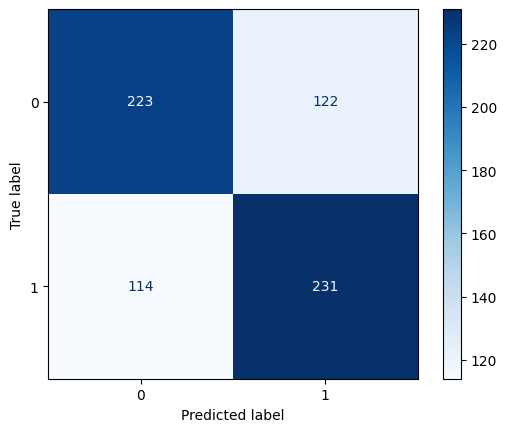

In [ ]:
best_subset_rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
best_subset_rf = train_test_predict(best_subset_rf,
                                    selected_training_features_rf,
                                    selected_testing_features_rf,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6536231884057971
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       345
           1       0.65      0.68      0.66       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



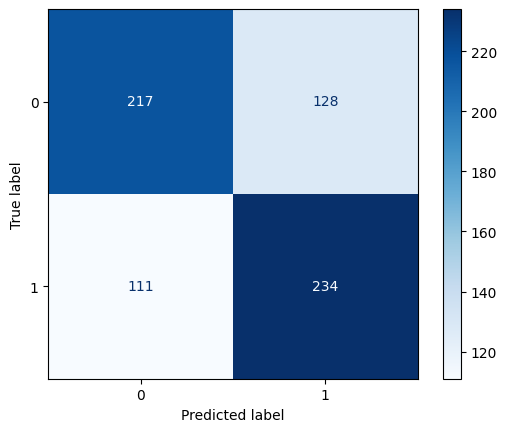

In [ ]:
best_subset_xgb = XGBClassifier(n_estimators = 10, max_depth = 3)
best_subset_xgb = train_test_predict(best_subset_xgb,
                                    selected_training_features_xgb,
                                    selected_testing_features_xgb,
                                    best_y_train,
                                    best_y_test)

In [ ]:
best_subset_lg.coef_

array([[ 0.54011077, -0.01400809,  0.        ,  0.02001712,  0.02114594,
        -0.01425171,  0.05339381, -0.06009817, -0.00508135,  0.07808162,
        -0.00226172, -0.00283418,  0.        ,  0.04435197, -0.0016537 ,
         0.04574401,  0.00475431,  0.04444329, -0.0658667 ,  0.08604649,
        -0.08175345,  0.00162918]])

In [ ]:
pd.DataFrame({"Features": selected_training_features_lg.columns,
              "weights": best_subset_lg.coef_[0]})

,Features,weights
0,home_game,0.540111
1,Pre_mean_FGM,-0.014008
2,Pre_mean_3PM,0.000000
3,Opponent_Pre_mean_3PM,0.020017
4,Pre_mean_3PA,0.021146
5,Opponent_Pre_mean_3PA,-0.014252
6,Opponent_Pre_mean_FTM,0.053394
7,Opponent_Pre_mean_FTA,-0.060098
8,Pre_mean_FT%,-0.005081
9,Opponent_Pre_mean_OREB,0.078082


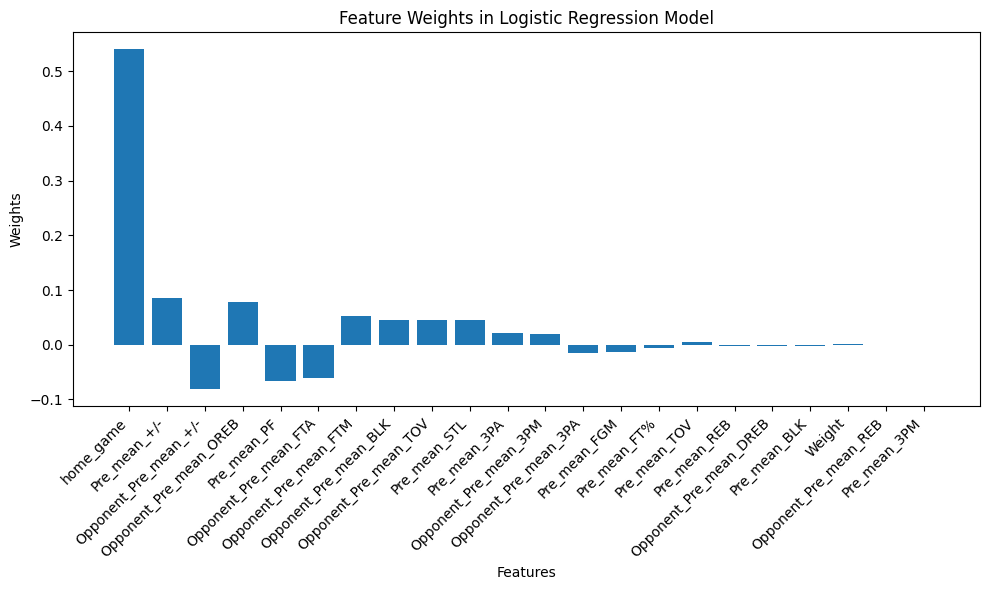

In [ ]:
weights_df = pd.DataFrame({"Features": selected_training_features_lg.columns,
              "weights": best_subset_lg.coef_[0]}).sort_values(by=['weights'], key=abs, ascending=False)


# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(weights_df['Features'], weights_df['weights'])
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Feature Weights in Logistic Regression Model")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Fine-tuning

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
false_positive_rate = []
true_positive_rate = []
auc_score = []
accuracy = []
precision_score = []
recall_score = []

for i in range(1,23):
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_lg)
  training_pca_compnonets = pca.transform(selected_training_features_lg)
  testing_pca_compnonets = pca.transform(selected_testing_features_lg)

  # Logistic Regression
  liblinear_log_model = LogisticRegressionCV(Cs=[2, 5, 7, 10],
                                 cv = 5,
                                 penalty="l1",
                                 solver="liblinear",
                                max_iter=1000)

  liblinear_log_model.fit(training_pca_compnonets, best_y_train)
  y_pred = liblinear_log_model.predict(testing_pca_compnonets)

  # false psotive, true positive, auc_score, overall accuracy
  fpr, tpr, thresholds = roc_curve(best_y_test, y_pred)
  auc_score.append(auc(fpr, tpr))
  accuracy.append(accuracy_score(best_y_test, y_pred))
  false_positive_rate.append(fpr)
  true_positive_rate.append(tpr)

In [ ]:
log_model_results = pd.DataFrame({
    "pca_n_components": range(1, 23),
    "accuracy": accuracy
})

In [ ]:
log_model_results

,pca_n_components,accuracy
0,1,0.500000
1,2,0.500000
2,3,0.662319
3,4,0.682609
4,5,0.679710
5,6,0.682609
6,7,0.689855
7,8,0.679710
8,9,0.678261
9,10,0.668116


In [ ]:
log_model_results.to_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/log_model_results.csv")

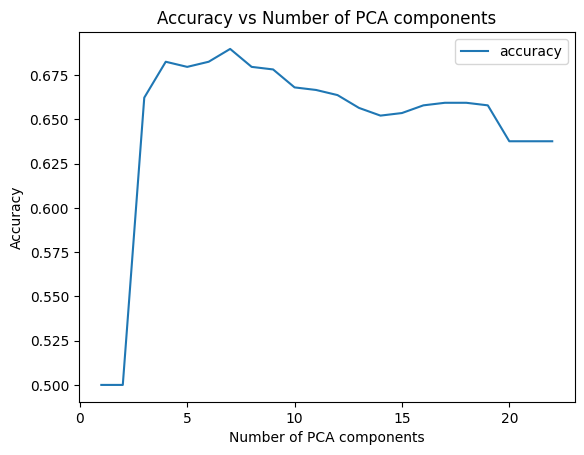

In [ ]:
sns.lineplot(x=range(1, 23), y=accuracy, label="accuracy")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA components")
plt.show()

In [ ]:
# weights_df = pd.DataFrame({"Features": ["z1", "z2"],
#               "weights": liblinear_log_model.coef_[0]}).sort_values(by=['weights'], key=abs, ascending=False)


# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust figure size if needed
# plt.bar(weights_df['Features'], weights_df['weights'])
# plt.xlabel("Features")
# plt.ylabel("Weights")
# plt.title("Feature Weights in Logistic Regression Model")
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# plt.show()

### XGB

In [ ]:
xgb_params = {
    "n_estimators": [5, 10, 50, 100],
    "max_depth": [3, 5, 10],
    "learning_rate" : [0.1, 0.15, 0.2]
}

In [ ]:
accuracy = []
params = []

for i in range(1, 23):
  print(i)
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_xgb)
  training_pca_compnonets = pca.transform(selected_training_features_xgb)
  testing_pca_compnonets = pca.transform(selected_testing_features_xgb)

  # Logistic Regression
  pca_xgb = XGBClassifier()
  pca_xgb_grid = GridSearchCV(pca_xgb, xgb_params)

  pca_xgb_grid.fit(training_pca_compnonets, best_y_train)
  params.append(pca_xgb_grid.best_params_)
  accuracy.append(pca_xgb_grid.best_score_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
xgb_model_results = pd.DataFrame({
    "pca_n_components": range(1, 23),
    "params": params,
    "accuracy": accuracy
})

In [ ]:
xgb_model_results = xgb_model_results.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
xgb_model_results.head()

,pca_n_components,params,accuracy
0,7,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.636723
1,15,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.632203
2,8,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.631638
3,22,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.629379
4,10,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.628814


In [ ]:
print(xgb_model_results.loc[0, "params"])

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 10}


### Random Forest

In [ ]:
rfc_params = {
    "n_estimators": [5, 10, 50, 100],
    "max_depth": [3, 5, 10]
}

accuracy = []
params = []

for i in range(1, 23):
  print(i)
  # pca
  pca = PCA(n_components=i)
  pca.fit(selected_training_features_rf)
  training_pca_compnonets = pca.transform(selected_training_features_rf)
  testing_pca_compnonets = pca.transform(selected_testing_features_rf)

  # Logistic Regression
  pca_rf = RandomForestClassifier()
  pca_rf_grid = GridSearchCV(pca_rf, rfc_params)

  pca_rf_grid.fit(training_pca_compnonets, best_y_train)
  params.append(pca_rf_grid.best_params_)
  accuracy.append(pca_rf_grid.best_score_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
rf_model_results = pd.DataFrame({
    "pca_n_components": range(1, 23),
    "params": params,
    "accuracy": accuracy
})

In [ ]:
rf_model_results = rf_model_results.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
rf_model_results

,pca_n_components,params,accuracy
0,22,"{'max_depth': 5, 'n_estimators': 100}",0.646893
1,21,"{'max_depth': 3, 'n_estimators': 100}",0.633898
2,20,"{'max_depth': 3, 'n_estimators': 50}",0.632768
3,10,"{'max_depth': 3, 'n_estimators': 5}",0.628249
4,9,"{'max_depth': 3, 'n_estimators': 50}",0.626554
5,19,"{'max_depth': 3, 'n_estimators': 100}",0.625989
6,16,"{'max_depth': 5, 'n_estimators': 10}",0.624859
7,11,"{'max_depth': 3, 'n_estimators': 50}",0.624859
8,12,"{'max_depth': 3, 'n_estimators': 100}",0.624859
9,7,"{'max_depth': 5, 'n_estimators': 100}",0.624859


In [ ]:
print(rf_model_results.loc[9, "params"])

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}


In [ ]:
log_model_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/log_model_results.csv")
xgb_model_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/xgb_model_results.csv")
rf_model_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STATS101C Project/Code/rf_model_results.csv")

In [ ]:
x = log_model_results.sort_values(by="pca_n_components")
y = xgb_model_results.sort_values(by="pca_n_components")
z = rf_model_results.sort_values(by="pca_n_components")

Text(0.5, 1.0, 'Accuracy vs Number of PCA components')

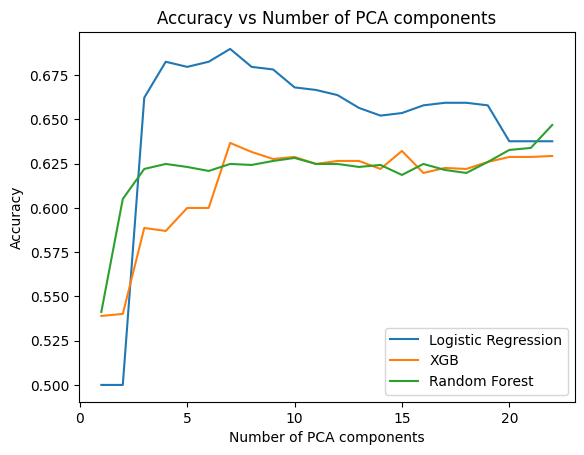

In [ ]:
sns.lineplot(x = x["pca_n_components"], y = x["accuracy"], label = "Logistic Regression")
sns.lineplot(x = y["pca_n_components"], y = y["accuracy"], label = "XGB")
sns.lineplot(x = z["pca_n_components"], y = z["accuracy"], label = "Random Forest")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA components")

Accuracy: 0.6826086956521739
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       345
           1       0.68      0.68      0.68       345

    accuracy                           0.68       690
   macro avg       0.68      0.68      0.68       690
weighted avg       0.68      0.68      0.68       690



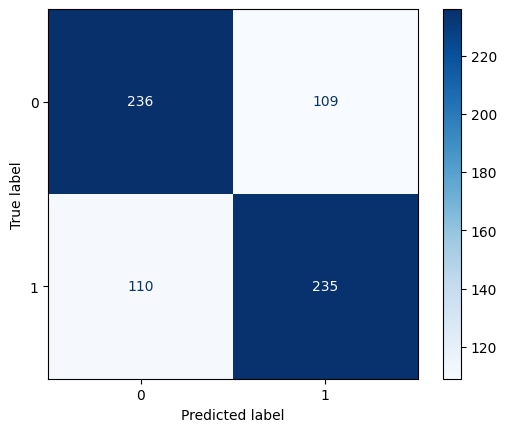

In [ ]:
pca = PCA(n_components=4)
pca.fit(selected_training_features_lg)
training_pca_compnonets = pca.transform(selected_training_features_lg)
testing_pca_compnonets = pca.transform(selected_testing_features_lg)

best_liblinear_log_model = LogisticRegression(
                                 penalty="l1",
                                 solver="liblinear",
                                max_iter=1000)

best_liblinear_log_model = train_test_predict(liblinear_log_model,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6492753623188405
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       345
           1       0.65      0.66      0.65       345

    accuracy                           0.65       690
   macro avg       0.65      0.65      0.65       690
weighted avg       0.65      0.65      0.65       690



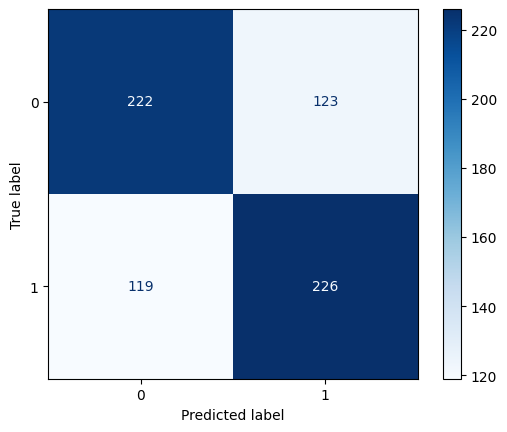

In [ ]:
pca = PCA(n_components=3)
pca.fit(selected_training_features_rf)
training_pca_compnonets = pca.transform(selected_training_features_rf)
testing_pca_compnonets = pca.transform(selected_testing_features_rf)

best_rf = RandomForestClassifier(n_estimators=50, max_depth=3)

best_rf = train_test_predict(best_rf,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)

Accuracy: 0.6260869565217392
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       345
           1       0.61      0.72      0.66       345

    accuracy                           0.63       690
   macro avg       0.63      0.63      0.62       690
weighted avg       0.63      0.63      0.62       690



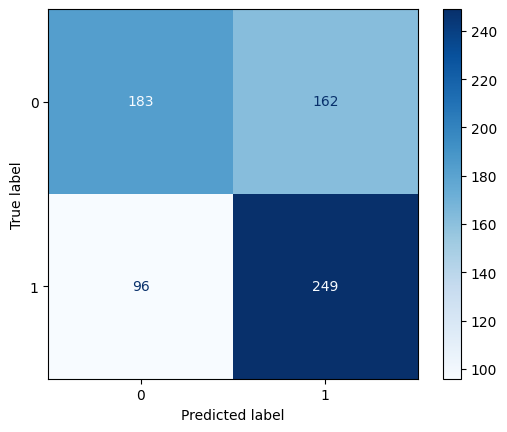

In [ ]:
pca = PCA(n_components=7)
pca.fit(selected_training_features_xgb)
training_pca_compnonets = pca.transform(selected_training_features_xgb)
testing_pca_compnonets = pca.transform(selected_testing_features_xgb)

best_xgb = XGBClassifier(learning_rate = 0.15, n_estimators=10, max_depth=3)

best_xgb = train_test_predict(best_xgb,
                                    training_pca_compnonets,
                                    testing_pca_compnonets,
                                    best_y_train,
                                    best_y_test)